In [1]:
from equadratures import polytree

from equadratures.parameter import Parameter
from equadratures.poly import Poly
from equadratures.basis import Basis

import scipy.stats as st
import random
import numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def fit_poly(X, y):

				try:
					N, d = X.shape
					myParameters = []

					for dimension in range(d):
						values = [X[i,dimension] for i in range(N)]
						values_min = min(values)
						values_max = max(values)

						if (values_min - values_max) ** 2 < 0.01:
							myParameters.append(Parameter(distribution='Uniform', lower=values_min-0.01, upper=values_max+0.01, order=3))
						else: 
							myParameters.append(Parameter(distribution='Uniform', lower=values_min, upper=values_max, order=3))
					myBasis = Basis('total-order')
					poly = Poly(myParameters, myBasis, method='least-squares', sampling_args={'sample-points':X, 'sample-outputs':y})
					poly.set_model()
					
					mse = np.linalg.norm(y - poly.get_polyfit(X).reshape(-1)) ** 2 / N
				except Exception as e:
					print("Warning fitting of Poly failed:", e)
					mse, poly = np.inf, None

				return mse, poly


In [5]:
def f(x, noise):
    if noise:
        noise = 0.25 * st.norm.rvs(0, 1)
    else:
        noise = 0
    if x <= 0.4:
        return 0.963 + 0.851*x + noise
    elif x > 0.4:
        return 1.909 - 0.868*x + noise
    
def sample():
    X, y = [], []
    Xs = np.linspace(-1, 2, num=20)
    for x in Xs:
        X.append(np.array([x]))
        y.append(np.array([f(x, True)]))
    return np.array(X), np.array(y)

X, y = sample()
y = np.reshape(y, (y.shape[0], 1))

Warning fitting of Poly failed: min() arg is an empty sequence


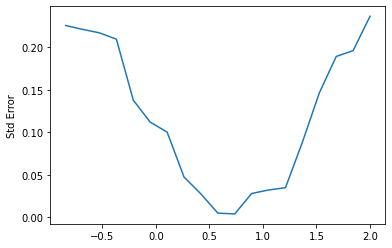

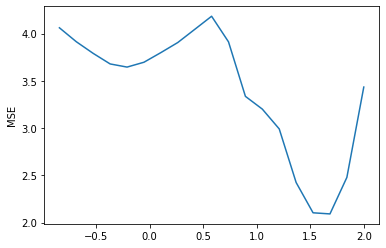

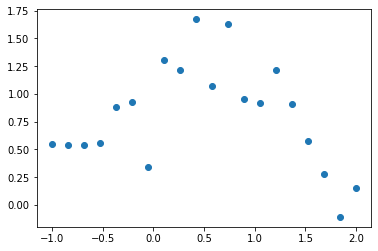

In [9]:
sd_errors = []
mse_errors = []
for i in range(0, len(X)):
    sd_errors.append(np.std(y) - ( np.std(y[0:i]) + np.std(y[i:]) ) / 2)
    mse_errors.append( ( fit_poly(X[0:i], y[0:i])[0] + fit_poly(X[i:],y[i:])[0] ) / 2)

fig, ax = plt.subplots()
plt.plot(X, sd_errors)
ax.set_ylabel('Std Error')
plt.show()

fig, ax = plt.subplots()
plt.plot(X, mse_errors)
ax.set_ylabel('MSE')
plt.show()

plt.scatter(X, y)
ax.set_ylabel('y')
plt.show()